$Fac = -Amp*sen( k*(z-z0) )$

$Ftot$ = $a*m$ = $Fac - m*g_{Ef} - B1*v$

$a$ = $Facm - g_{Ef} - b_1*v$

onde: $g_{Ef}$ é o aceleração da gravidade efetiva ($g_{Ef}=g*(\rho_{bolinha}-\rho_{Ar})/\rho_{bolinha}$),
$Facm$ = $Fac/m$, e
$b_1$ = $B_1/m$


# Funções para simulação

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# [L]=mm , [t]=ms
def derivadas( t=None, Y=[None], Amp=0.02, freq=40, z0=0, b1=0.005, gE=0.010, OUTPUT='dYdt' ):
  vs = 340.
  L = vs/freq
  k = 2*np.pi/(L/2)
  if (OUTPUT=='z0ef'):
    z0ef = z0 + (1/k)*np.arcsin(-gE/Amp)
    return z0ef
  else:
    z, v = Y
    Fac_m = -Amp*np.sin( k*(z-z0) )
    a = Fac_m - gE - b1*v
    return [v, a]


In [ ]:
def AmpEf1( t, AOn, tOff, dtOff, tauOff=0.1, tauOn=0.1 ):
  tOn = tOff + dtOff
  if (t<tOff):
    AEf = AOn
  elif (t<tOn):
    AEf = AOn*np.exp( - (t-tOff)/tauOff )
  else:
    AEf = AOn*( 1 - np.exp( -(t-tOn)/tauOn ) )
  return AEf


# Para testes (pode ser pulado)

-0.35416666666666674


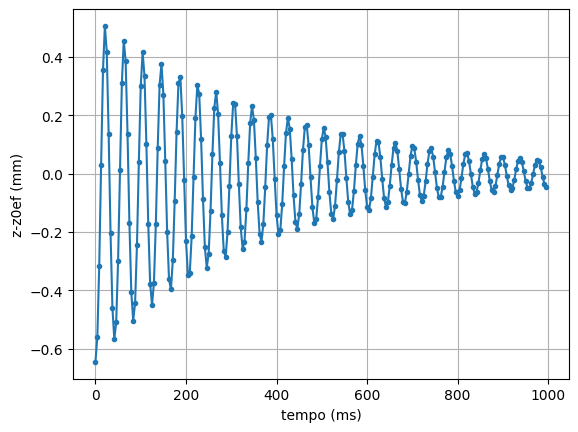

In [ ]:
# Para testar a rotina de simulacao (pode ser pulado)
z0ef = derivadas(OUTPUT='z0ef')
print( z0ef )

Y0 = [-1, 0]
ts = np.arange( 0, 1000, (1000/240) )
dYdt = lambda t,Y: derivadas(t,Y)
sol = solve_ivp( dYdt, (0, ts[-1]), Y0,  t_eval=ts )

plt.figure()
plt.plot( sol.t, sol.y[0]-z0ef, '.-')
plt.xlabel( 'tempo (ms)')
plt.ylabel( 'z-z0ef (mm)')
plt.grid()
plt.show()

In [ ]:
# Para visualizar os aquivos de dados (pode ser pulado)
DADOS = np.loadtxt( '17,43V.txt' )
texp = 1000*(DADOS[:,0]-0.0 )
zexp = (16/308)*DADOS[:,-1]
plt.figure()
plt.plot(texp,zexp, '*-')
plt.grid()
#plt.xlim([-50,50])
plt.show()

FileNotFoundError: ignored

# Para ler e analisar dados experimentais

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DIR = '/content/drive/MyDrive/USP/Orientandos/Grupo_Levitação/GabrielQuaglio/Programas em Python/Encontra Pontos Críticos/Dados fornecidos pelo programa/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
CONFIGs = {}
Escala = (16/308)   # para ir de pixels para mm (em mm/pixels)
CONFIGs['9'] = {'File':'9,17Vpcriticos.txt', 't0':0.07, 'fatorEscala':Escala, 'AmpOn':0.018, 'b1':0.009 }
CONFIGs['14'] = {'File':'14,27vpcriticos.txt', 't0':0.097, 'fatorEscala':Escala, 'AmpOn':0.048, 'b1':0.009 }
CONFIGs['17'] = {'File':'17,43Vpcriticos.txt', 't0':0.035, 'fatorEscala':Escala, 'AmpOn':0.036, 'b1':0.009 }
CONFIGs['21'] = {'File':'21,5vpcriticos.txt','t0':0.06, 'fatorEscala':Escala, 'AmpOn':0.06, 'b1':0.011 }

CONFIG_ATU = CONFIGs['21']
DADOS = np.loadtxt(DIR+CONFIG_ATU['File'] )
texp = 1000*(DADOS[:,0] - CONFIG_ATU['t0'] )
zexp = CONFIG_ATU['fatorEscala']*DADOS[:,-1]
b1 = CONFIG_ATU['b1']
AmpOn = CONFIG_ATU['AmpOn']

FileNotFoundError: /content/drive/MyDrive/USP/Orientandos/Grupo_Levitação/GabrielQuaglio/Programas em Python/Encontra Pontos Críticos/Dados fornecidos pelo programa/21,5vpcriticos.txt not found.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
toff = 0
dtoff = 30
gEf= 0.009
#b1 = 0.011
#AmpOn = 0.036

def AmpEf( t, AOn, tOff, dtOff, tauOff=0.1, tauOn=0.1 ):
  return AmpEf1( t, AOn, tOff, dtOff, tauOff, tauOn )

z0ef = derivadas(OUTPUT='z0ef', Amp=AmpOn, gE=gEf)
print( 'Z0ef = %.3f mm' % (z0ef) )

Y0 = [z0ef, 0]
ts = np.arange( -10, 600, 1000/240 )
dYdt = lambda t,Y: derivadas( t, Y, Amp=AmpEf(t,AOn=AmpOn,tOff=toff,dtOff=dtoff), b1=b1, gE=gEf )
sol = solve_ivp( dYdt, (ts[0], ts[-1]), Y0,  t_eval=ts, max_step=0.1, rtol=1e-12, atol=1e-12 )

plt.figure()
plt.plot( sol.t, sol.y[0]-z0ef, '-')
plt.plot( texp, zexp, '*r' )
plt.xlabel( 'tempo (ms)')
plt.ylabel( 'z-z0ef (mm)')
plt.grid()
#plt.xlim([-10, 100])
#plt.ylim([-20, 10])
plt.title( CONFIG_ATU['File'] )
plt.show()


#plt.figure()
#plt.plot( sol.t, sol.y[1], '.-')
#plt.xlabel( 'tempo (ms)')
#plt.ylabel( 'vz (mm/ms)')
#plt.grid()


NameError: name 'AmpOn' is not defined

# Para exportar dados simulados

In [ ]:
tSim = sol.t
zSim0 = (sol.y[0]-z0ef)/CONFIG_ATU['fatorEscala']
#np.random.seed()

SIGMAy = 0.15
zSim_comErro = zSim0
for i in range(len(zSim0)):
  zSim_comErro[i] += SIGMAy * np.random.randn()

conteudo = np.column_stack( (tSim, zSim_comErro) )
np.savetxt( 'SIM_'+CONFIG_ATU['File'], conteudo, fmt='%.6f', delimiter='\t' )

NameError: ignored

In [ ]:
rho_o = 20 # kg/m³
nu = 18.5e-6 # Pa*s
rho_f = 1.2 # kg/m³
r = 2.e-3 # m
import numpy as np
v = np.logspace( -4, 3, int(1e4) )
Re = rho_f * (2*r) * abs(v) / nu
print(np.mean(Re))

16108.766755702993
